In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
con=sqlite3.connect(r'D:\Project_data/zomato_rawdata.sqlite')  # sql connection

In [4]:
pd.read_sql_query('SELECT * FROM Users',con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
df=pd.read_sql_query('SELECT * FROM Users',con)

In [6]:
df.shape

(51717, 18)

In [7]:
df.columns   # all the columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
# Dealing with missing values

In [9]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
(df.isnull().sum()/len(df))* 100    # percentage of missing values for every column

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rate'].replace(('NEW','-'),np.nan,inplace=True)

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
'4.1/5'.split('/')[0]

'4.1'

In [15]:
type('4.1/5'.split('/')[0])

str

In [16]:
float('4.1/5'.split('/')[0])

4.1

In [17]:
df['rate']=df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x)==str else x)

In [18]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [19]:
# Is there any relation between online order option and rating of the restaurant?

In [20]:
x=pd.crosstab(df['rate'],df['online_order'])

In [21]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<AxesSubplot:xlabel='rate'>

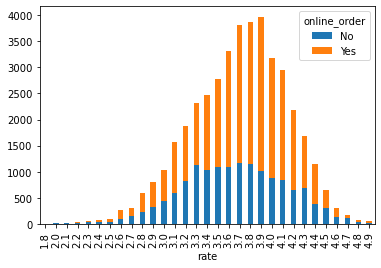

In [22]:
x.plot(kind='bar',stacked=True)

In [23]:
x.sum(axis=1).astype(float)  # sum respect to rows

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [24]:
x.div(x.sum(axis=1).astype(float),axis=0)

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


In [25]:
normalize_df=x.div(x.sum(axis=1).astype(float),axis=0)

In [26]:
normalize_df*100     #  percentage of acceptability of online order of a restaurant with respect to rating

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<AxesSubplot:xlabel='rate'>

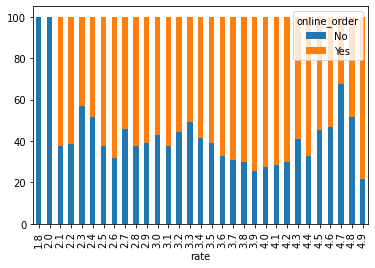

In [27]:
(normalize_df*100).plot(kind='bar',stacked=True)


In [ ]:
# So we can conclude that the restaurant has often more rating which restaurents  accepts online order

In [28]:
# Data cleaning to perform text analysis

In [29]:
df['rest_type'].isnull().sum()

227

In [30]:
data=df.dropna(subset=['rest_type'])

In [31]:
data['rest_type'].isnull().sum()

0

In [32]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [33]:
data['rest_type'].str.contains('Quick Bites')  # substring contains "Quick Bites" or not

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [34]:
data[data['rest_type'].str.contains('Quick Bites')].head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari


In [35]:
quick_bites_df=data[data['rest_type'].str.contains('Quick Bites')].head(2)

In [36]:
quick_bites_df.shape

(2, 18)

In [37]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [38]:
quick_bites_df['reviews_list']=quick_bites_df['reviews_list'].apply(lambda x:x.lower()) # converting to lower

In [39]:
from nltk.corpus import RegexpTokenizer

In [40]:
tokenizer=RegexpTokenizer("[a-zA-Z]+")

In [41]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [42]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])  # all special characters are excluded

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [43]:
sample=data[0:10000]

In [44]:
reviews_tokens=sample['reviews_list'].apply(tokenizer.tokenize)

In [45]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [46]:
#  removal of stopwords

In [47]:
from nltk.corpus import stopwords

In [48]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Milan
[nltk_data]     chakraborty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
stop=stopwords.words('english')    # these are stopwords

In [50]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
stop.extend(['rated','n','nan','x','Rated','RATED'])   # extending 'stop' list by taking more stopwords

In [52]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
rev3=reviews_tokens[3]

In [54]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [55]:
review_tokens_clean=reviews_tokens.apply(lambda each_review: [token for token in each_review if token not in stop] )

In [56]:
review_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [57]:
type(review_tokens_clean)

pandas.core.series.Series

In [58]:
# Performing Unigram analysis 

In [59]:
total_reviews_2D=list(review_tokens_clean)  # converting series to 2D list

In [60]:
total_reviews_1D=[]
for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)                 # converting 2D list to 1D list
        

In [61]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [62]:
from nltk import FreqDist

In [63]:
fd=FreqDist()

In [64]:
for word in total_reviews_1D:
    fd[word]=fd[word]+1

In [65]:
fd.most_common(20)           # top 20 keywords

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

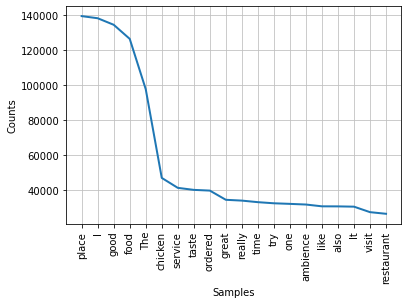

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [66]:
fd.plot(20)  # plotting these top 20 keywords

In [67]:
# Performing BI-gram and Trigram analysis analysis on data

In [68]:
from nltk import FreqDist,bigrams, trigrams

In [69]:
bigrams=bigrams(total_reviews_1D)

In [70]:
bigrams

<generator object bigrams at 0x000001E90AB526D0>

In [71]:
fd_bigrams=FreqDist()
for bigram in bigrams:
    fd_bigrams[bigram]=fd_bigrams[bigram]+1

In [72]:
fd_bigrams.most_common(20)            # Top 20 bigrams

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

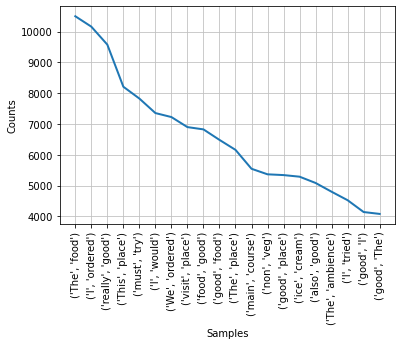

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [73]:
fd_bigrams.plot(20)

In [74]:
tri_grams=trigrams(total_reviews_1D)

In [75]:
tri_grams

<generator object trigrams at 0x000001E90AB52D60>

In [76]:
fd_trigrams=FreqDist()
for trigram in tri_grams:
    fd_trigrams[trigram]=fd_trigrams[trigram]+1

In [77]:
fd_trigrams.most_common(20)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582)]

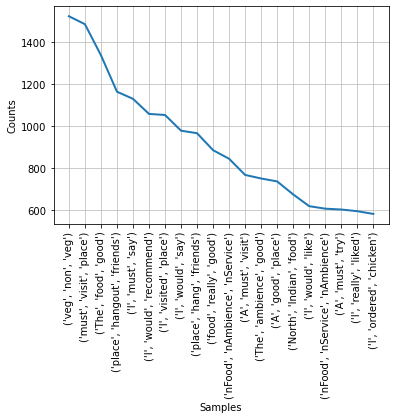

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [78]:
fd_trigrams.plot(20)

In [79]:
# Extract geographical coordinates from the data

In [80]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [83]:
!pip install geocoder
!pip install geopy

     -------------------------------------- 98.6/98.6 kB 706.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 119.8/119.8 kB 996.2 kB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [82]:
len(df['location'].unique())  # 94 total unique locations in Bangaluru city

94

In [83]:
df['location']=df['location']+', Bangaluru, Karnataka, India'

In [84]:
df['location'].unique()

array(['Banashankari, Bangaluru, Karnataka, India',
       'Basavanagudi, Bangaluru, Karnataka, India',
       'Mysore Road, Bangaluru, Karnataka, India',
       'Jayanagar, Bangaluru, Karnataka, India',
       'Kumaraswamy Layout, Bangaluru, Karnataka, India',
       'Rajarajeshwari Nagar, Bangaluru, Karnataka, India',
       'Vijay Nagar, Bangaluru, Karnataka, India',
       'Uttarahalli, Bangaluru, Karnataka, India',
       'JP Nagar, Bangaluru, Karnataka, India',
       'South Bangalore, Bangaluru, Karnataka, India',
       'City Market, Bangaluru, Karnataka, India',
       'Nagarbhavi, Bangaluru, Karnataka, India',
       'Bannerghatta Road, Bangaluru, Karnataka, India',
       'BTM, Bangaluru, Karnataka, India',
       'Kanakapura Road, Bangaluru, Karnataka, India',
       'Bommanahalli, Bangaluru, Karnataka, India', nan,
       'CV Raman Nagar, Bangaluru, Karnataka, India',
       'Electronic City, Bangaluru, Karnataka, India',
       'HSR, Bangaluru, Karnataka, India',
       '

In [85]:
df_copy=df.copy()

In [86]:
df_copy['location'].isnull().sum()

21

In [87]:
df_copy=df_copy.dropna(subset=['location'])

In [88]:
df_copy['location'].isnull().sum()

0

In [89]:
locations=pd.DataFrame(df_copy['location'].unique())
locations.columns=['name']

In [90]:
locations

,name
0,"Banashankari, Bangaluru, Karnataka, India"
1,"Basavanagudi, Bangaluru, Karnataka, India"
2,"Mysore Road, Bangaluru, Karnataka, India"
3,"Jayanagar, Bangaluru, Karnataka, India"
4,"Kumaraswamy Layout, Bangaluru, Karnataka, India"
...,...
88,"West Bangalore, Bangaluru, Karnataka, India"
89,"Magadi Road, Bangaluru, Karnataka, India"
90,"Yelahanka, Bangaluru, Karnataka, India"
91,"Sahakara Nagar, Bangaluru, Karnataka, India"


In [91]:
from geopy.geocoders import Nominatim

In [92]:
geolocator=Nominatim(user_agent='app',timeout=None)

In [93]:
lat=[]
lon=[]
for location in locations['name']:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

In [94]:
locations['latitude']=lat
locations['longitude']=lon

In [95]:
locations

,name,latitude,longitude
0,"Banashankari, Bangaluru, Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangaluru, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangaluru, Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangaluru, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangaluru, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore, Bangaluru, Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangaluru, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangaluru, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangaluru, Karnataka, India",13.062147,77.580061


In [96]:
# build geographical heatmaps

In [97]:
locations.isnull().sum()

name         0
latitude     3
longitude    3
dtype: int64

In [98]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
45,"St. Marks Road, Bangaluru, Karnataka, India",NaN,NaN
79,"Rammurthy Nagar, Bangaluru, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangaluru, Karnataka, India",NaN,NaN


In [99]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [100]:
locations['latitude'][45]=12.9764122
locations['longitude'][45]=77.6017437
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813             # taking these datas from google

In [101]:
df['cuisines'].isnull().sum()

45

In [102]:
df=df.dropna(subset=['cuisines'])

In [103]:
df[df['cuisines'].str.contains('North Indian')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari, Bangaluru, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari, Bangaluru, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari, Bangaluru, Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi, Bangaluru, Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,"Basavanagudi, Bangaluru, Karnataka, India",Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51706,51706,https://www.zomato.com/bangalore/red-glow-whit...,"Poornima Complex, Dodsworth Layout, Whitefield...",Red Glow,No,No,3.7,27,+91 9740571131,"Whitefield, Bangaluru, Karnataka, India",Pub,None,"North Indian, Continental","1,200","[('Rated 5.0', 'RATED\n Excellent place had n...",[],Pubs and bars,Whitefield
51708,51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,"Whitefield, Bangaluru, Karnataka, India","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,"Whitefield, Bangaluru, Karnataka, India","Casual Dining, Bar",None,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,"Whitefield, Bangaluru, Karnataka, India","Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [104]:
north_india=df[df['cuisines'].str.contains('North Indian')]

In [105]:
north_india.shape

(21085, 18)

In [106]:
north_india['location'].value_counts()

BTM, Bangaluru, Karnataka, India                  2469
HSR, Bangaluru, Karnataka, India                  1123
Whitefield, Bangaluru, Karnataka, India           1059
Marathahalli, Bangaluru, Karnataka, India         1038
JP Nagar, Bangaluru, Karnataka, India              958
                                                  ... 
Hebbal, Bangaluru, Karnataka, India                  4
Jakkur, Bangaluru, Karnataka, India                  3
Central Bangalore, Bangaluru, Karnataka, India       2
West Bangalore, Bangaluru, Karnataka, India          1
Peenya, Bangaluru, Karnataka, India                  1
Name: location, Length: 90, dtype: int64

In [107]:
north_india_rest_count=north_india['location'].value_counts().reset_index().rename(columns={'index':'name','location':'count'})

In [108]:
north_india_rest_count

,name,count
0,"BTM, Bangaluru, Karnataka, India",2469
1,"HSR, Bangaluru, Karnataka, India",1123
2,"Whitefield, Bangaluru, Karnataka, India",1059
3,"Marathahalli, Bangaluru, Karnataka, India",1038
4,"JP Nagar, Bangaluru, Karnataka, India",958
...,...,...
85,"Hebbal, Bangaluru, Karnataka, India",4
86,"Jakkur, Bangaluru, Karnataka, India",3
87,"Central Bangalore, Bangaluru, Karnataka, India",2
88,"West Bangalore, Bangaluru, Karnataka, India",1


In [109]:
locations.head(2)

,name,latitude,longitude
0,"Banashankari, Bangaluru, Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangaluru, Karnataka, India",12.941726,77.575502


In [110]:
heatmap_df=north_india_rest_count.merge(locations,on='name',how='left')   # merging two dataframes

In [111]:
heatmap_df

,name,count,latitude,longitude
0,"BTM, Bangaluru, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangaluru, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangaluru, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangaluru, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangaluru, Karnataka, India",958,12.912076,77.579393
...,...,...,...,...
85,"Hebbal, Bangaluru, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangaluru, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangaluru, Karnataka, India",2,13.010129,77.554801
88,"West Bangalore, Bangaluru, Karnataka, India",1,13.022235,77.567183


In [139]:
!pip install folium

     ------------------------------------ 102.3/102.3 kB 979.2 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
import folium

In [113]:
basemap=folium.Map()

In [114]:
basemap

In [115]:
from folium.plugins import HeatMap

In [116]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [117]:
HeatMap(heatmap_df[['latitude', 'longitude','count']]).add_to(basemap)

In [118]:
basemap

In [119]:
# How to automate data analysis

In [120]:
def get_heatmap(cuisine):
    cuisine_df=df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest_count=cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name','location':'count'})
    heatmap_df=cuisine_rest_count.merge(locations,on='name',how='left')
    print(heatmap_df.head(4))
    
    heatmap=folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude','count']]).add_to(basemap)
    return basemap

In [121]:
get_heatmap('South Indian')    # To see where serves south indian dices more

                                     name  count   latitude  longitude
0        BTM, Bangaluru, Karnataka, India    815  12.911276  77.604565
1   JP Nagar, Bangaluru, Karnataka, India    437  12.912076  77.579393
2        HSR, Bangaluru, Karnataka, India    436  12.911623  77.638862
3  Jayanagar, Bangaluru, Karnataka, India    416  12.929273  77.582423


In [122]:
df['cuisines'].unique()       # To see where serves Biryani dices more

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [123]:
get_heatmap('Biryani') 

                                        name  count   latitude  longitude
0           BTM, Bangaluru, Karnataka, India    844  12.911276  77.604565
1           HSR, Bangaluru, Karnataka, India    419  12.911623  77.638862
2    Whitefield, Bangaluru, Karnataka, India    336  12.969637  77.749745
3  Marathahalli, Bangaluru, Karnataka, India    308  12.955257  77.698416
